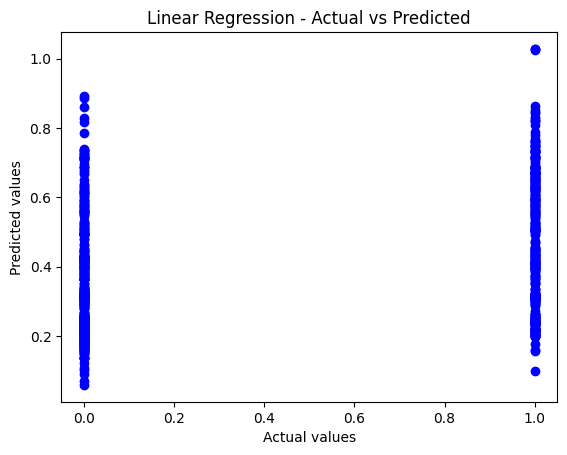

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the Titanic dataset
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

def linear_regression(x_train, y_train):
    # Add a column of ones to the x_train matrix for the intercept term
    x_train = np.c_[np.ones(x_train.shape[0]), x_train]

    # Calculate the coefficients using the normal equation: theta = (X^T * X)^-1 * X^T * y
    coefficients = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)

    return coefficients

# Preprocess the data
x_train = data[['Pclass', 'Age', 'Fare']].values
y_train = data['Survived'].values

# Handle missing values
x_train[np.isnan(x_train)] = 0
y_train[np.isnan(y_train)] = 0

# Normalize the features
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)

# Train the linear regression model
coefficients = linear_regression(x_train, y_train)

# Predict the target variable using the trained model
y_pred = np.dot(np.c_[np.ones(x_train.shape[0]), x_train], coefficients)

# Plot the original data points
plt.scatter(y_train, y_pred, color='blue')

# Add labels and title
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression - Actual vs Predicted')

# Show the plot
plt.show()

